<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Reduccion_de_la_varianza_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reducción de varianza**
## Muestreo importancia

Notemos que podemos reescribir la integral
$$ I = ∫ f(x) dx = \int [ \frac{f(x)}{g(x)} ] g(x) dx, \quad g(x)\neq 0 $$

y reinterpretando:
$$ I = E_{g} ( \frac{f(x)}{g(x)} )  $$

y usamos el estimador
$$ \theta_3 = \frac{1}{N} ∑_{i=1}^{N} \frac{f(x_i)}{g(x_i)}, \quad x_i \thicksim g(x) $$


Las librerias que vamos a ocupar son las siguientes:

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import time

Para resolver este ejercicio tenemos la función:
$$ f(x) = \cos (\frac{\pi x}{2}) $$

In [18]:
def f(x):
	f = np.cos( (x * np.pi) / 2 )
	return f

Como $ f(x) = \cos ( \frac{\pi x}{2} ) $ es una función suave y positiva en $[0,1]$, entonces proponemos
$$ g(x) = c ( 1 - \frac{\pi^2 x^2}{8} ) $$

con $ c = \frac{24}{24 - \pi^2} $

In [19]:
def g(x):
	g = (24 / (24 - np.pi ** 2)) * (1 - ((np.pi ** 2) * (x **2)) / 8 )
	return g

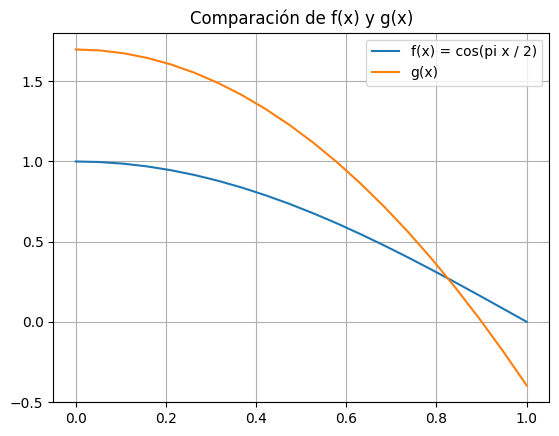

In [20]:
xx = np.linspace(0,1,20)
plt.plot(xx, f(xx), label='f(x) = cos(pi x / 2)')
plt.plot(xx, g(xx), label='g(x)')
plt.title("Comparación de f(x) y g(x)")
plt.legend()
plt.grid()
plt.show()

Recordemos como teniamos nuestro Monte Carlo crudo

In [28]:
def mc_crudo(N, n, func=g, a=0.0, b=1.0):
  thetas = []
  t0 = time.perf_counter()
  for _ in range(n):
      suma = 0.0
      for _ in range(N):
        u = rd.random()
        x = a + u * (b - a)
        suma += func(x)
      theta2 = (b - a) / N * suma
      thetas.append(theta2)
  t1 = time.perf_counter()
  tiempo_promedio = (t1 - t0) / n
  return np.mean(thetas), np.var(thetas), tiempo_promedio

Ahora, vamos a generar muestras distruibuidas segun g(x) usando el método de aceptacion y rechazo

In [22]:
def muestra_g(n):
	c = 24 / (24 - np.pi ** 2)
	lista = []
	for i in range (n):
		u = rd.random()
		w = rd.uniform(0,c)
		if w <= g(u):
			lista.append(u)
	return lista

In [23]:
M = muestra_g(1000)

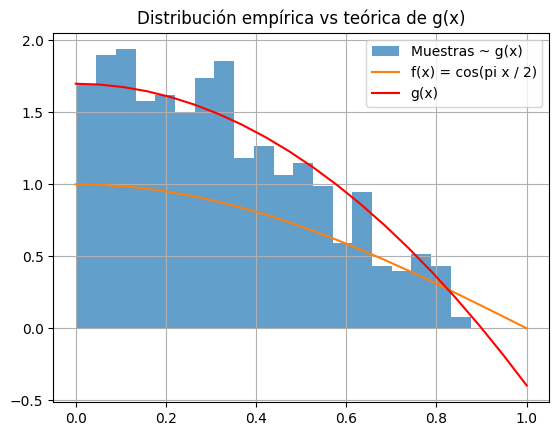

In [24]:
plt.hist(M, bins=20, density=True, alpha=0.7, label='Muestras ~ g(x)')
plt.plot(xx, f(xx), label='f(x) = cos(pi x / 2)')
plt.plot(xx, g(xx), 'r', label='g(x)')
plt.title("Distribución empírica vs teórica de g(x)")
plt.legend()
plt.grid()
plt.show()

Ahora vamos a calcular la estimacion de la integral mediante muestreo importancia

In [47]:
def mc_importancia(N,n):
  t0 = time.perf_counter()
  thetas = []
  for _ in range(n):
    X = muestra_g(N)
    valores = [f(xi) / g(xi) for xi in X]
    thetas.append(np.mean(valores))
  t1 = time.perf_counter()
  tiempo_promedio = (t1 - t0) / n
  return np.mean(thetas), np.var(thetas), tiempo_promedio

In [48]:
N=1000
n=200

mean_crudo, var_crudo, tiempo_crudo = mc_crudo(N, n)
mean_importancia, var_importancia, tiempo_importancia = mc_importancia(N,n)

In [49]:
print("Monte Carlo crudo:                     media =", mean_crudo, " varianza =", var_crudo, " tiempo =", tiempo_crudo)
print("Monte Carlo crudo con la red de var:   media =", mean_importancia, " varianza =", var_importancia, " tiempo =", tiempo_importancia)

Monte Carlo crudo:                     media = 0.9972636110116434  varianza = 0.00040832050540806115  tiempo = 0.0006297069349989214
Monte Carlo crudo con la red de var:   media = 0.6168599876710825  varianza = 3.973566524948662e-05  tiempo = 0.0020046270450006887


Para ver cuanto se redujo la varianza, ocupamos lo siguiente
$$ \text{Reduccion} = \frac{ \text{Varianza Original} - \text{ Varianza Nueva }}{ \text{ Varianza Original } } * 100 $$

In [50]:
reduccion=((var_crudo - var_importancia)/var_crudo)*100
print("Reduccion de la varianza: ", reduccion, "%")

Reduccion de la varianza:  90.26851095568267 %
